In [14]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [6]:
from tensorflow.keras import models, layers, optimizers, regularizers

In [7]:
train = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/train', color_mode='grayscale')
test = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/test', color_mode='grayscale')
val = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/val', color_mode='grayscale')

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [12]:
history = model.fit(train,
               batch_size=30,
               epochs=10,
               validation_data=(val))

Epoch 1/10
163/163 [==============================] - 63s 379ms/step - loss: 176.8251 - accuracy: 0.8468 - val_loss: 1.2750 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 60s 362ms/step - loss: 0.6121 - accuracy: 0.9751 - val_loss: 1.3137 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 60s 366ms/step - loss: 0.1348 - accuracy: 0.9910 - val_loss: 3.3572 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 61s 372ms/step - loss: 0.0852 - accuracy: 0.9937 - val_loss: 0.5294 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 61s 368ms/step - loss: 0.0562 - accuracy: 0.9937 - val_loss: 3.7962e-06 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 61s 371ms/step - loss: 0.0579 - accuracy: 0.9942 - val_loss: 1.8680 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 61s 370ms/step - loss: 0.2169 - accuracy: 0.9883 - val_loss: 4.2044 - 

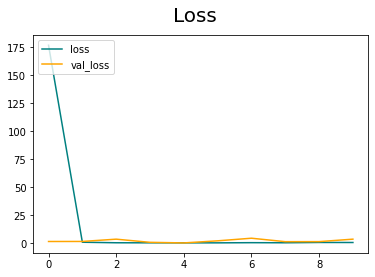

In [20]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

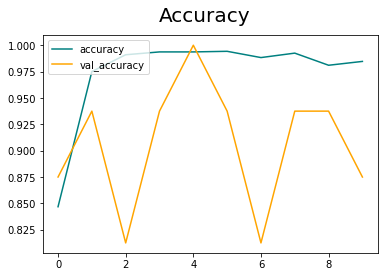

In [21]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [22]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [23]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [24]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 93ms/step


In [25]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.75, shape=(), dtype=float32) tf.Tensor(0.9692308, shape=(), dtype=float32) tf.Tensor(0.77884614, shape=(), dtype=float32)


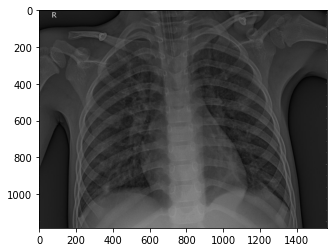

In [27]:
img = cv2.imread('person14_virus_44.jpeg')
plt.imshow(img)
plt.show()

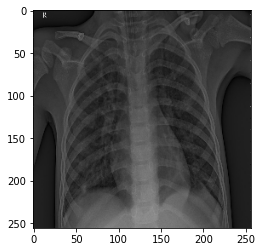

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 17ms/step


In [30]:
yhat

array([[0.5088587]], dtype=float32)

In [31]:
if yhat > 0.5: 
    print(f'Predicted class has pneumonia')
else:
    print(f'Predicted class does not have pneumonia')

Predicted class has pneumonia


In [36]:
from tensorflow.keras.models import load_model

In [37]:
model.save('imageclassifierbetter.h5')

In [38]:
new_model = load_model('imageclassifierbetter.h5')

In [39]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


array([[0.645924]], dtype=float32)